x.shape: (26, 2)


C:\Users\Hamms\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


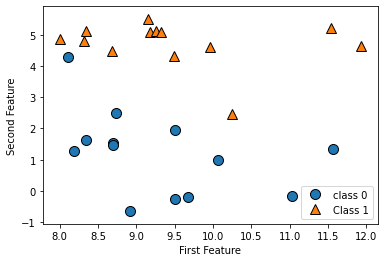

In [1]:
import mglearn
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn
X,y = mglearn.datasets.make_forge()
#generating make forge dataset
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("x.shape: {}".format(X.shape))
#plotting dataset and showing x shape

Text(0, 0.5, 'Target')

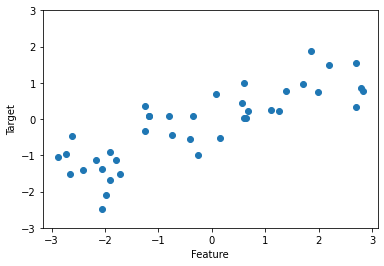

In [2]:
#creating the synthetic wave dataset to model an estimate for our algorithm 
X,y = mglearn.datasets.make_wave(n_samples =40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [3]:
#we will now use KNN with 3 neighbors to show how that is done


In [4]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

C:\Users\Hamms\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
#importing the Make_forge dataset and spliting it into a 75% by 25% training test split

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
#creating the algorithim and setting its parameters

In [8]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
#fitting the training data to the algorithm

In [10]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [11]:
#gathering the test set predictions from the KNN 3 neighbor algorithm

In [12]:
print('Test set Accuracy: {}'.format(clf.score(X_test, y_test)))

Test set Accuracy: 0.8571428571428571


In [13]:
#next we are going to create a graph to analyze the KNeighborCLassifers decsion making process
#this is know as a decsion boundry

#we are going to graph the decsion boundry for 1 3 and 9 neighbors using a for loop to initilze and process the aglortim and 
#and data each time

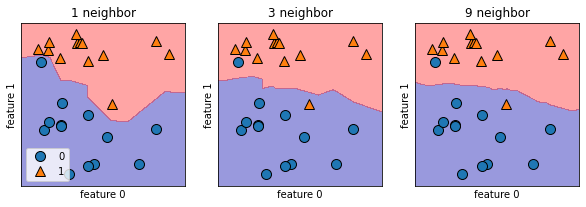

In [14]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [15]:
#example to hammer home generalization and complexity of algorithms 

In [16]:
from sklearn.datasets import load_breast_cancer

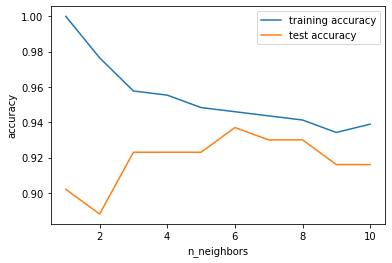

In [17]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
#testing KNN from 1-10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #build model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train,y_train)
    #Record Training Accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #Record generalization Accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label ="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [18]:
#this gives you a general idea of what the best amount of KNN is needed to pull the best result from generalized datda

In [19]:
#now we are going to do the same thing, but with a regression version of the knn

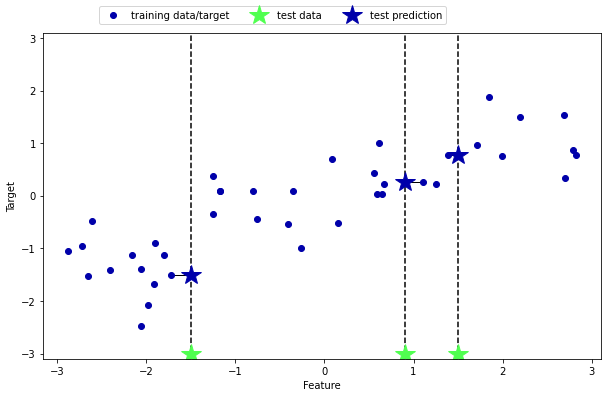

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

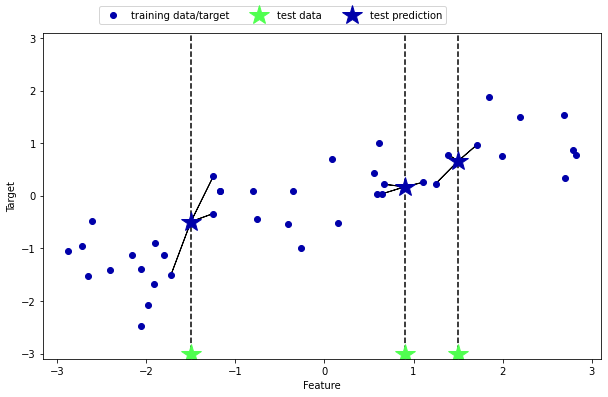

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
#this is two plots showing what it would look like to use the regresssion algorithm

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
X,y = mglearn.datasets.make_wave(n_samples=40)
#split the wave dataset into traing and test set

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
#instintiate them oddel and set the number of neighbors to sondier to 3
reg = KNeighborsRegressor(n_neighbors=3)
#fit the model 
reg.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [26]:
#now we can make predictions

In [27]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [28]:
#Regression uses R^2 scored to determine the accuracy returning a number between 0-1 as the percentage

In [29]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


In [30]:
#here we have 83% accuracy

In [31]:
#We can create plots to show the decsion making process of the regression algorithm 

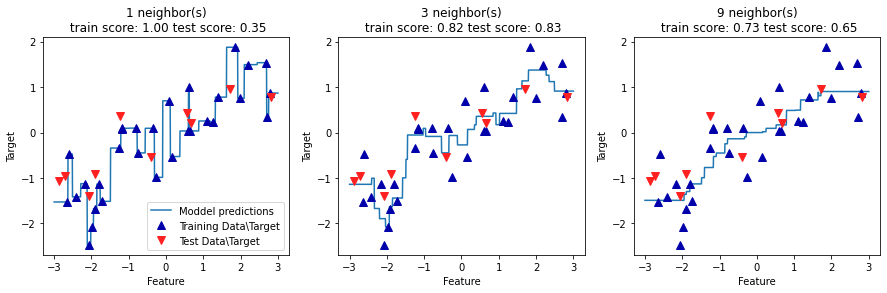

In [32]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
#create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    #make predictions using 1, 3 or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(['Moddel predictions', 'Training Data\Target', 'Test Data\Target'], loc='best')

In [33]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [34]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [35]:
print("traing set score: {}".format(lr.score(X_train, y_train)))
print("test set score: {}".format(lr.score(X_test,y_test)))

traing set score: 0.6700890315075756
test set score: 0.65933685968637


In [36]:
# showing how linear regression models are not effecctive on datasets with low amounts of features

In [37]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [38]:
#loading up the information for the boston housing dataset
#506 samples with 105 derived features for each
#here we will be able to see the true power of linear regression

In [39]:
print("training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set Score: {:.2f}".format(lr.score(X_test,y_test)))

training set score: 0.95
Test set Score: 0.61


In [40]:
#this model was over fitted for the job and did not generlize well with new data

In [41]:
#one of the most commonly used alternatives to linear regression is ridge regression

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
test set score: 0.75


In [43]:
#used ridge linear regression which creates a constract to generelize more on the training data set 
#that was sucessful in gathering more accurate test data than regular linear regression

In [44]:
ridge = Ridge(0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.93
test set score: 0.77


In [45]:
#you can also see that tweaking the alpha is useful for possibly obtaining better results

In [49]:
from sklearn.linear_model import Lasso
lasso= Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [50]:
#laso narrows feaftures and focuses only on key ones to try and provide a better answer
#unfortunetaly it became overfitted and tried to over simplify the problem